# Proizvodnja električne energije iz VE

Prilikom procjene godišnje proizvodnje električne energije iz vjetroelektrana uzeti su u obzir satni podaci o brzini vjetra na 50 m visine na području Tomislavgrada za 2019., 2020. i 2021. godinu, te za Podveležje za 2021. godinu, kada je VE Podveležje počela sa radom. Izvor podataka je https://power.larc.nasa.gov/data-access-viewer/ koji osim brzine vjetra na 50 m visine bilježe i brzinu vjetra na 10 m visine. Tehnički podaci o vjetroagregatima su dostupni na web stranicama u dijelu: Reference, te će biti nakndadno uneseni.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%pip install seaborn 
import seaborn as sns

Meteorološki podaci za Tomislavgrad i Podveležje su spašeni u četiri xslx. fajla. Oni su dostupni  i u .csv ekstenziji.

In [105]:
def open_the_file(name):
    file_x=pd.read_excel(name,header=0)
    return file_x

In [106]:
#otvaranje podataka

file2_tom=open_the_file("POWER_Point_Hourly_20190101_20191231_043d7223N_017d2731E_LST-TOMISLAVGRAD.xlsx")
file2_tom_2020=open_the_file("POWER_Point_Hourly_20200101_20210101_043d7139N_017d2395E_LST-TOM.xlsx")
file2_tom_2021=open_the_file("POWER_Point_Hourly_20210101_20220101_043d7142N_017d2393E_LST-tom.xlsx")

file1_mostar_2021=open_the_file("POWER_Point_Hourly_20210101_20220101_043d3145N_017d9060E_LST-podv.xlsx")

Svi fajlovi su strukturirani kao naredni - prikazana prva 2 reda i sastoje se od satnih podataka za jednu godinu (cca. 8800 podataka koji se odnose na temperaturu zraka na visini od 2 m (T2M), brzini vjetra na visini od 10 m, i 50 m (WS10M i WS50M), te pravcu vjetra na 10 m visine (WD10M). Za svaki podatak su zabilježeni sat, dan, godina i mjesec.

In [107]:
file2_tom.head(2)

,YEAR,MO,DY,HR,T2M,WS10M,WD10M,WS50M
0,2019,1,1,0,-1.92,6.46,31.65,9.72
1,2019,1,1,1,-2.13,6.19,31.91,9.52


Lopatice vjetroturbina na obje lokacije su postavljene na nešto većim visinama, ali će se za dalji proračun uzeti **brzina vjetra na visini od 50 m.**
Statističke karakteristike svakog od fajlova se mogu prikazati putem funkcije **describe_file** koja kao argument uzima željeni fajl i daje statističke paramtere izračunate po kolonama.

2019.: Maksimalna brzina vjetra u Tomislavgradu dostiže oko 20,64 m/s na 50 m visine. Postoje određene sumnje u tačnost izvora podataka s obzirom na zabilježene podatke o minimumu temperatura (-12,3°C), mada se ona oko tih vrijednosti kreće i u 2020. i 2021. godini.Standardne devijacije brzine vjetra u oba kraja su značajne i ukazuju na njegovu promjenjivost. Minimalna brzina vjetra je 0,06 m/s. Prosječna brzina vjetra u 2019. je bila oko 4,7 m/s, sa standardnom devijacijom reda veličine srednje vrijednosti.  

2020.: Maksimalna brzina vjetra u Tomislavgradu dostiže oko 24,04 m/s na toj visini. Standardne devijacije brzine vjetra u oba kraja su značajne i ukazuju na njegovu promjenjivost.  Maksimalna brzina vjetra na ovoj lokaciji je oko 24 m/s, a minimalna 0,05 m/s. Prosječna brzina vjetra u 2020. je ostala slična onoj iz 2019. - 4,5 m/s, sa standardnom devijacijom reda veličine srednje vrijednosti.  

2021:Maksimalna brzina vjetra u Tomislavgradu dostiže oko 15,2 m/s na toj visini, a u Podveležju oko 15,1 m/s. Važno je istaći da tabela bilježi ekstremnu vrijednost minimuma brzine vjetra - 999 m/s, te će se ovaj podatak zamijeniti srednjom vrijednošću jer je u pitanju očita greška očitavanja. Za obje lokacije ova je pojava zabilježena 9.8.2021.

Intermitentnost električne energije iz VE je posmatrana u određenim studijama NOS BiH, u smislu sekundarne i tercijarne regulacije.

In [108]:
def describe_file(file):
        return(file[["T2M","WS10M","WS50M"]].describe())

In [109]:
describe_file(file2_tom)#2019 tomislavgrad

,T2M,WS10M,WS50M
count,8760.000000,8760.000000,8760.000000
mean,10.921790,3.457708,4.658413
std,9.281895,2.401730,2.962694
min,-12.130000,0.060000,0.060000
25%,4.212500,1.850000,2.557500
50%,10.360000,2.710000,3.880000
75%,17.362500,4.370000,6.090000
max,36.940000,17.600000,20.640000


In [110]:
describe_file(file2_tom_2020)#2020 tomislavgrad

,T2M,WS10M,WS50M
count,8784.000000,8784.000000,8784.000000
mean,10.792801,3.364686,4.502746
std,8.813820,2.301233,2.862620
min,-8.030000,0.080000,0.050000
25%,3.940000,1.780000,2.400000
50%,9.780000,2.680000,3.830000
75%,16.770000,4.410000,6.060000
max,37.560000,19.410000,24.040000


In [111]:
describe_file(file2_tom_2021)#2021 tomislavgrad

,T2M,WS10M,WS50M
count,8760.000000,8760.000000,8760.000000
mean,10.118308,3.335952,1.738632
std,9.811743,2.058637,52.517246
min,-13.110000,0.100000,-999.000000
25%,2.870000,1.870000,2.590000
50%,9.020000,2.800000,4.020000
75%,16.962500,4.350000,5.920000
max,35.520000,12.810000,15.230000


In [112]:
describe_file(file1_mostar_2021)#2021 mostar

,T2M,WS10M,WS50M
count,8784.000000,8784.000000,8784.000000
mean,8.595344,2.876625,1.350357
std,9.226610,1.744106,52.413920
min,-15.850000,0.030000,-999.000000
25%,1.830000,1.660000,2.390000
50%,7.740000,2.440000,3.740000
75%,15.252500,3.770000,5.350000
max,32.990000,11.290000,15.110000


Text(0.5, 1.0, 'Tomislavgrad')

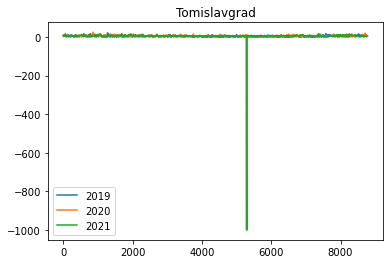

In [113]:
file2_tom["WS50M"].plot(label="2019")
file2_tom_2020["WS50M"].plot(label="2020")
file2_tom_2021["WS50M"].plot(label="2021")
plt.legend()
plt.title("Tomislavgrad")

In [114]:
file2_tom_2021.loc[file2_tom_2021["WS50M"]<-800].head(2)

,YEAR,MO,DY,HR,T2M,WS10M,WS50M,WD10M
5281,2021,8,9,1,19.98,1.97,-999.0,124.32
5282,2021,8,9,2,20.06,1.68,-999.0,119.55


In [115]:
file2_tom_2021.loc[file2_tom_2021["WS50M"]<-800]=file2_tom_2021["WS50M"].mean()#zamjena sa srednjom vrijednošću

In [116]:
file1_mostar_2021.loc[file1_mostar_2021["WS50M"]<-800].head(2)

,YEAR,MO,DY,HR,T2M,WS10M,WS50M,WD10M
5281,2021,8,9,1,18.48,1.72,-999.0,168.23
5282,2021,8,9,2,18.62,1.54,-999.0,167.38


In [117]:
file1_mostar_2021.loc[file1_mostar_2021["WS50M"]<-800]=file1_mostar_2021["WS50M"].mean()

Text(0.5, 1.0, 'Tomislavgrad')

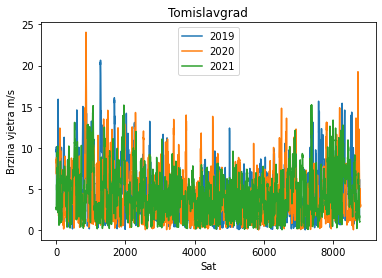

In [118]:
file2_tom["WS50M"].plot(label="2019")
file2_tom_2020["WS50M"].plot(label="2020")
file2_tom_2021["WS50M"].plot(label="2021")
plt.legend()
plt.ylabel("Brzina vjetra m/s")
plt.xlabel("Sat")
plt.title("Tomislavgrad")

Text(0.5, 1.0, 'Mostar')

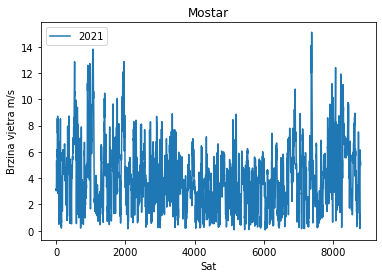

In [119]:
file1_mostar_2021["WS50M"].plot(label="2021")
plt.legend()
plt.ylabel("Brzina vjetra m/s")
plt.xlabel("Sat")
plt.title("Mostar")

Ako se uporede podaci samo za 2021. godinu na dvije lokacije, može se primijetiti da ekstremne vrijednosti brzine vjetra vuku raspodjele udesno (ekstremne vrijednosti u vidu tački na boxplotovima.)Opseg vrijednosti je sličan u oba slučaja.

Text(0.5, 1.0, 'Tomislavgrad')

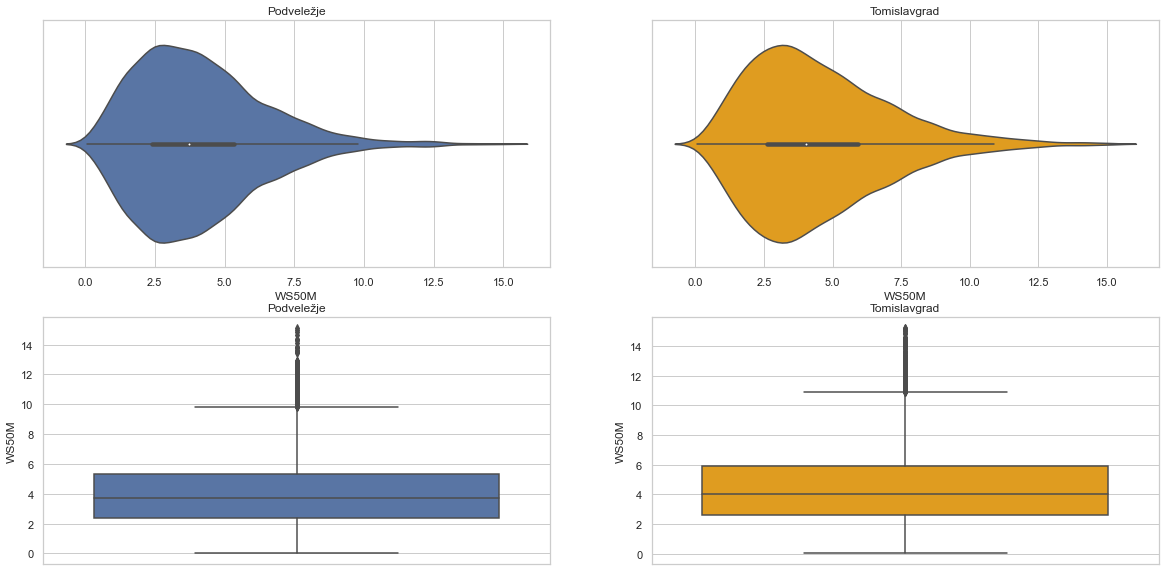

In [174]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(nrows=2,ncols=2, figsize=(20,10))

sns.violinplot(x=file1_mostar_2021["WS50M"],ax=ax[0,0])
ax[0,0].set_title("Podveležje")

ax[0,1] = sns.violinplot(x=file2_tom_2021["WS50M"],ax=ax[0,1],color="orange")
ax[0,1].set_title("Tomislavgrad")


sns.boxplot(y=file1_mostar_2021["WS50M"],ax=ax[1,0])
ax[1,0].set_title("Podveležje")

ax[1,0] = sns.boxplot(y=file2_tom_2021["WS50M"],ax=ax[1,1],color="orange")
ax[1,0].set_title("Tomislavgrad")

(0.0, 9222.15)

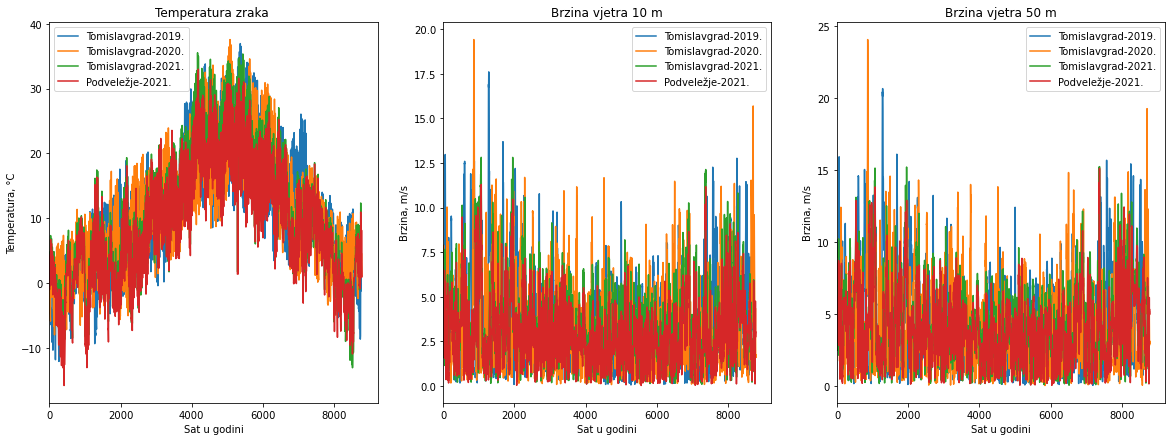

In [120]:
fig, ax=plt.subplots(ncols=3, figsize=(20,7))
file_names=[file2_tom,file2_tom_2020,file2_tom_2021,file1_mostar_2021]
cities=["Tomislavgrad-2019.","Tomislavgrad-2020.","Tomislavgrad-2021.","Podveležje-2021."]


[i['T2M'].plot(ax=ax[0],label=cities[k]) for k,i in enumerate(file_names) ]
ax[0].set_title("Temperatura zraka ")
ax[0].set_xlabel("Sat u godini")
ax[0].set_ylabel("Temperatura, °C")
ax[0].legend()
ax[0].set_xlim(0)

[i["WS10M"].plot(ax=ax[1],label=cities[k]) for k,i in enumerate(file_names) ]
ax[1].set_title("Brzina vjetra 10 m")
ax[1].set_xlabel("Sat u godini")
ax[1].set_ylabel("Brzina, m/s")
ax[1].legend()
ax[1].set_xlim(0)

[i["WS50M"].plot(ax=ax[2],label=cities[k]) for k,i in enumerate(file_names) ]
ax[2].set_title("Brzina vjetra 50 m")
ax[2].set_xlabel("Sat u godini")
ax[2].set_ylabel("Brzina, m/s")
ax[2].legend()
ax[2].set_xlim(0)


Na internetu su pronađeni podaci za krivu snage za vjetroturbine tip Siemens SWT-2.3-108 snage 2,3 MW. Na lokaciji VE Mesihovina instalisana su 22 ovakva vjetroagregata. Za lokaciju VE Jelovača nije pronađen tačan tip vjetroturbina, osim što je poznat podatak da je instalisana snaga po vjetroagregatu 2 MW. Za krivu snage je uzet tip Siemens Gamesa G114-2.0 MW. Na ovoj lokaciji je instalirano 18 vjetroagregata.
Na lokaciji Podveležje je instalirano 15 vjetroagregata tipa Siemens SWT-3.2-113, te je preuzeta njena kriva snage

In [121]:
#Mesihovina
x=np.arange(3,20.5,0.5)
y=27,58,92,157,225,374,524,722,919,1155,1389,1670,1947,2163,2243,2273,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300,2300
#Jelovača
x2=np.arange(3,26,1)
y2=[32,146,342,621,1008,1486,1836,1965,1994,1999,2000,2000,2000,2000,2000,2000,2000,2000,2000,1906,1681,1455,1230]

#mostar
xm=np.arange(3,23,1)
ym=64,169,350,623,1004,1506,2115,2712,3083,3187,3199,3200,3200,3200,3200,3200,3200,3200,3200,3200

Text(0.5, 1.0, 'Siemens SWT-3.2-113')

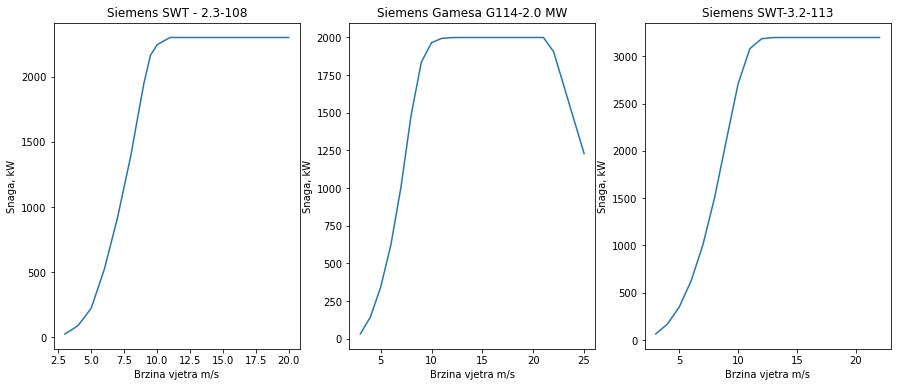

In [122]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.plot(x,y)
ax1.set_xlabel("Brzina vjetra m/s")
ax1.set_ylabel("Snaga, kW")
ax1.set_title ("Siemens SWT - 2.3-108")


ax2.plot(x2,y2)
ax2.set_xlabel("Brzina vjetra m/s")
ax2.set_ylabel("Snaga, kW")
ax2.set_title ("Siemens Gamesa G114-2.0 MW")

ax3.plot(xm,ym)
ax3.set_xlabel("Brzina vjetra m/s")
ax3.set_ylabel("Snaga, kW")
ax3.set_title ("Siemens SWT-3.2-113")

Za Siemens SWT - 2.3-108 podaci o snazi na krivoj su dati za korak brzine vjetra od 0.5 m/s a za Siemens Gamesa G114-2.0 MW u koraku od 1.0 m/s. Kako bi se ovi podaci povezali sa brzinama vjetra iz meteorološke baze, izvršit će se linearna interpolacije kako bi se dobila snaga vjetroagregata pri brzinama npr. 3.1 m/s, 3.2 m/s i sl.

In [123]:
def lin_interpolate_power(array1,array2,array3):
    inter=np.interp(array1,array2,array3)
    return inter

In [124]:
#Mesihovina
x_wind=np.arange(3.0,20.5,0.1)
y_power=lin_interpolate_power(x_wind, x, y)

#Jelovača

x_wind2=np.arange(3.0,25.1,0.1)
y_power2=lin_interpolate_power(x_wind2, x2, y2)

#Podveležje

x_windm=np.arange(3.0,22.1,0.1)
y_powerm=lin_interpolate_power(x_windm, xm, ym)

Text(0.5, 0, 'Brzina vjetra, m/s')

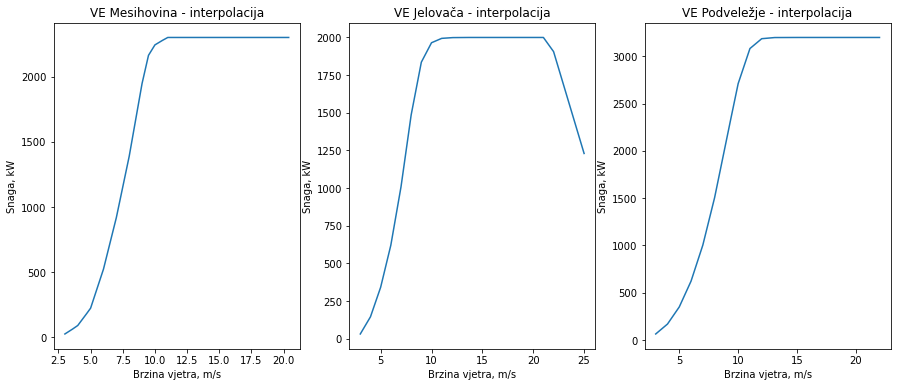

In [125]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))

ax1.plot(x_wind,y_power)
ax1.set_title("VE Mesihovina - interpolacija")
ax1.set_ylabel("Snaga, kW")
ax1.set_xlabel("Brzina vjetra, m/s")

ax2.plot(x_wind2,y_power2)
ax2.set_title("VE Jelovača - interpolacija")
ax2.set_ylabel("Snaga, kW")
ax2.set_xlabel("Brzina vjetra, m/s")

#
ax3.plot(x_windm,y_powerm)
ax3.set_title("VE Podveležje - interpolacija")
ax3.set_ylabel("Snaga, kW")
ax3.set_xlabel("Brzina vjetra, m/s")

Sada će se izračunati snaga za vjetroagregate pri brzinama vjetra koje su zabilježene u meterološkim podacima na visini od 50 m/s. Podaci će se prije toga zaokružiti na jednu decimalu. Svakoj brzini vjetra će se pridružiti interpolirana snaga u kW dobivena u prethodnim koracima.

In [126]:
#zaokruživanje na jednu decimalu
wind_tom=round(file2_tom[["WS10M","WS50M"]],1)
wind_tom_2020=round(file2_tom_2020[["WS10M","WS50M"]],1)
wind_tom_2021=round(file2_tom_2021[["WS10M","WS50M"]],1)
wind_mo_2021=round(file1_mostar_2021[["WS10M","WS50M"]],1)

In [127]:
wind_tom=wind_tom.assign(P50M_Mesih=0)
wind_tom=wind_tom.assign(P50M_Jel=0)


wind_tom_2020=wind_tom_2020.assign(P50M_Mesih=0)
wind_tom_2020=wind_tom_2020.assign(P50M_Jel=0)

wind_tom_2021=wind_tom_2021.assign(P50M_Mesih=0)
wind_tom_2021=wind_tom_2021.assign(P50M_Jel=0)

wind_mo=wind_mo.assign(P50M_Podv=0)


In [128]:
def float_and_round (array1):
    array1=np.float64(np.asarray(array1))
    array1=np.round(array1,1)
    return array1

In [129]:
x_wind=float_and_round(x_wind)
x_wind2=float_and_round(x_wind2)

x_windm=float_and_round(x_windm)
for value,value2 in zip(x_wind,y_power):
    wind_tom.loc[wind_tom["WS50M"]==value,"P50M_Mesih"]=value2
    wind_tom_2020.loc[wind_tom_2020["WS50M"]==value,"P50M_Mesih"]=value2
    wind_tom_2021.loc[wind_tom_2021["WS50M"]==value,"P50M_Mesih"]=value2
    
    
for value,value2 in zip(x_wind2,y_power2):
    wind_tom.loc[wind_tom["WS50M"]==value,"P50M_Jel"]=value2
    wind_tom_2020.loc[wind_tom_2020["WS50M"]==value,"P50M_Jel"]=value2
    wind_tom_2021.loc[wind_tom_2021["WS50M"]==value,"P50M_Jel"]=value2

for value,value2 in zip(x_windm,y_powerm):
    wind_mo.loc[wind_mo["WS50M"]==value,"P50M_Podv"]=value2

In [130]:
wind_tom.head(3) #2019 #prva 3 reda

,WS10M,WS50M,P50M_Mesih,P50M_Jel
0,6.5,9.7,2195.0,1926.3
1,6.2,9.5,2163.0,1900.5
2,6.1,9.5,2163.0,1900.5


In [131]:
wind_tom_2020.head(3) #2020

,WS10M,WS50M,P50M_Mesih,P50M_Jel
0,3.6,6.9,879.6,969.3
1,4.3,7.7,1248.6,1342.6
2,4.8,8.0,1389.0,1486.0


In [132]:
wind_tom_2021.head(3) #2021

,WS10M,WS50M,P50M_Mesih,P50M_Jel
0,1.6,2.8,0.0,0.0
1,1.6,2.8,0.0,0.0
2,1.6,2.6,0.0,0.0


In [133]:
wind_mo.head(3)

,WS10M,WS50M,P50M_Mesih,P50M_Jel,P50M_Podv
0,6.5,9.7,0,0,2532.9
1,6.2,9.5,0,0,2413.5
2,6.1,9.5,0,0,2413.5


In [155]:
file1_mostar_2021[(file1_mostar_2021["MO"]==3)&(file1_mostar_2021["DY"]==1)].index

Int64Index([1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426,
            1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437,
            1438, 1439],
           dtype='int64')

In [ ]:
wind_mo["P50M_Podv"][wind_mo["P50M_Podv"]]

Text(0.5, 1.0, '2021.')

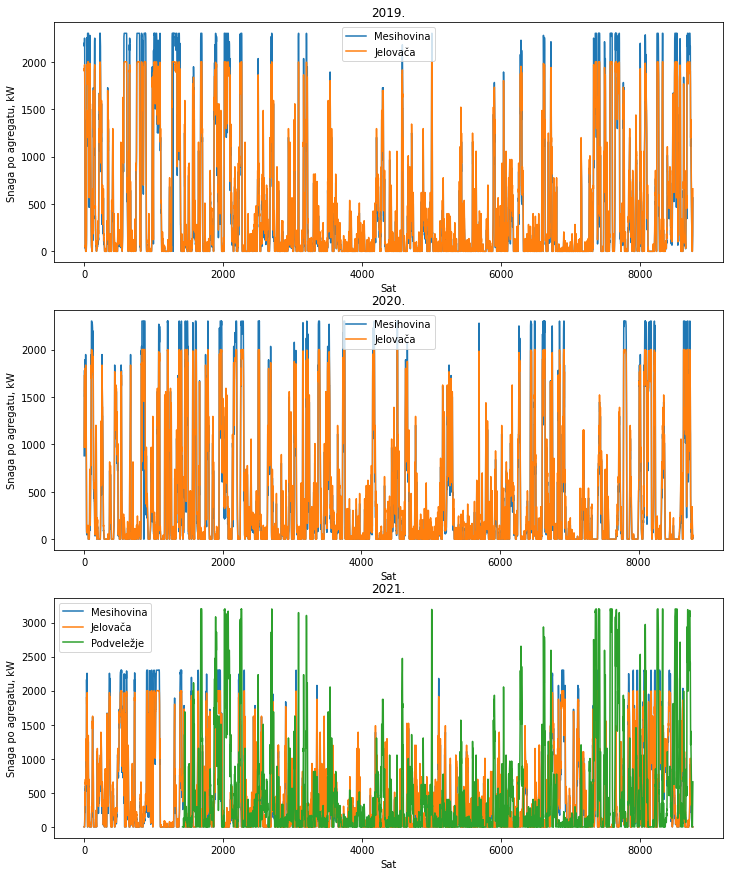

In [156]:
fig,ax=plt.subplots(nrows=3,figsize=(12,15))

wind_tom["P50M_Mesih"].plot(label="Mesihovina",ax=ax[0])
wind_tom["P50M_Jel"].plot(label="Jelovača",ax=ax[0])
ax[0].legend()
ax[0].set_xlabel("Sat")
ax[0].set_ylabel("Snaga po agregatu, kW")
ax[0].set_title("2019.")

wind_tom_2020["P50M_Mesih"].plot(label="Mesihovina",ax=ax[1])
wind_tom_2020["P50M_Jel"].plot(label="Jelovača",ax=ax[1])
ax[1].legend()
ax[1].set_xlabel("Sat")
ax[1].set_ylabel("Snaga po agregatu, kW")
ax[1].set_title("2020.")


wind_tom_2021["P50M_Mesih"].plot(label="Mesihovina",ax=ax[2])
wind_tom_2021["P50M_Jel"].plot(label="Jelovača",ax=ax[2])
wind_mo["P50M_Podv"][1416:].plot(label="Podveležje",ax=ax[2])
ax[2].legend()
ax[2].set_xlabel("Sat")
ax[2].set_ylabel("Snaga po agregatu, kW")
ax[2].set_title("2021.")


Sada se može izračunati godišnja proizvodnja električne energije iz vjetroelektrana, s tim da se za VE Podveležje podaci uzimaju od 1.3.2021. - indeks 1416. Dobiveni rezultati su niži od onih koje izvještava NOS BiH, s tim da, osim tačnosti izvora meteorloških podataka, ulogu igra i visina vjetrotrubina, s obzirom da su one više od 50 m gdje je data brzina vjetra. U stvarnosti, satna rezolucija bi se mogla skalirati prema ukupnoj godišnjoj proizvodnji iz VE za 2019.(253,7 GWh) 2020.(261,8 GWh) i 2021.godinu. Ovdje treba napomenuti i da prema energetskom bilansu FBiH iz 2019. stoji podatak da je godišnja proizvodnja iz VE 166 GWh, što je u tom slučaju blisko dobijenom rezultatu prilikom proračnu, ali se znatno razlikuje od podataka koje izvještava NOS BiH. 

In [163]:
ann_production_mes=wind_tom["P50M_Mesih"].sum(axis=0)
ann_production_jel=wind_tom["P50M_Jel"].sum(axis=0)

print("Godišnja proizvodnja po agregatu 2019., Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu 2019., Jelovača: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_ve=total_mes+total_jel
print("Ukupna godišnja proizvodnja 2019., Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja 2019., Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja 2019., VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu 2019., Mesihovina: 3970164.200000004 kWh
Godišnja proizvodnja po agregatu 2019., Jelovača:  4074701.6000000034 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Ukupna godišnja proizvodnja 2019., Mesihovina: 87.34361240000008 GWh
Ukupna godišnja proizvodnja 2019., Jelovača:  73.34462880000005 GWh
Ukupna godišnja proizvodnja 2019., VE:  160.68824120000014 GWh


In [160]:
ann_production_mes=wind_tom_2020["P50M_Mesih"].sum()
ann_production_jel=wind_tom_2020["P50M_Jel"].sum()

print("Godišnja proizvodnja po agregatu 2020., Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu 2020., Jelovača: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_ve=total_mes+total_jel
print("Ukupna godišnja proizvodnja 2020., Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja 2020., Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja 2020., VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu 2020., Mesihovina: 3734440.000000004 kWh
Godišnja proizvodnja po agregatu 2020., Jelovača:  3910627.200000003 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Ukupna godišnja proizvodnja 2020., Mesihovina: 82.15768000000008 GWh
Ukupna godišnja proizvodnja 2020., Jelovača:  70.39128960000005 GWh
Ukupna godišnja proizvodnja 2020., VE:  152.54896960000013 GWh


In [162]:
ann_production_mes=wind_tom_2021["P50M_Mesih"].sum()
ann_production_jel=wind_tom_2021["P50M_Jel"].sum()
ann_production_mo=wind_mo["P50M_Podv"][1416:].sum()
#ispraviti za datum polčetka 1.3.2021.
print("Godišnja proizvodnja po agregatu 2021., Mesihovina:", ann_production_mes, "kWh")
print("Godišnja proizvodnja po agregatu 2021., Jelovača: ", ann_production_jel, "kWh")
print("Godišnja proizvodnja po agregatu 2021., Podveležje: ", ann_production_jel, "kWh")
print("Broj agregata, Mesihovina:", 22)
print("Broj agregata, Jelovača: ", 18)
print("Broj agregata, Podveležje: ", 15)
total_mes=(ann_production_mes*22)/1000000
total_jel=(ann_production_jel*18)/1000000
total_mo=(ann_production_mo*15)/1000000
total_ve=total_mes+total_jel+total_mo
print("Ukupna godišnja proizvodnja 2021., Mesihovina:", total_mes, "GWh")
print("Ukupna godišnja proizvodnja 2021., Jelovača: ", total_jel, "GWh")
print("Ukupna godišnja proizvodnja 2021., Podveležje: ", total_mo, "GWh")
print("Ukupna godišnja proizvodnja 2021., VE: ", total_ve, "GWh")

Godišnja proizvodnja po agregatu 2021., Mesihovina: 3481312.200000004 kWh
Godišnja proizvodnja po agregatu 2021., Jelovača:  3726921.0000000037 kWh
Godišnja proizvodnja po agregatu 2021., Podveležje:  3726921.0000000037 kWh
Broj agregata, Mesihovina: 22
Broj agregata, Jelovača:  18
Broj agregata, Podveležje:  15
Ukupna godišnja proizvodnja 2021., Mesihovina: 76.58886840000008 GWh
Ukupna godišnja proizvodnja 2021., Jelovača:  67.08457800000006 GWh
Ukupna godišnja proizvodnja 2021., Podveležje:  51.12640350000006 GWh
Ukupna godišnja proizvodnja 2021., VE:  194.79984990000023 GWh


In [167]:
wind_tom["P50M_Total, GWh"]=(wind_tom["P50M_Mesih"]*22+wind_tom["P50M_Jel"]*18)/1000000
wind_tom_2020["P50M_Total, GWh"]=(wind_tom_2020["P50M_Mesih"]*22+wind_tom_2020["P50M_Jel"]*18)/1000000
wind_tom_2021["P50M_Total, GWh"]=(wind_tom_2021["P50M_Mesih"]*22+wind_tom_2021["P50M_Jel"]*18)/1000000
wind_tom_2021["P50M_Total, GWh"][1416:]=wind_tom_2021["P50M_Total, GWh"][1416:]+((wind_mo["P50M_Podv"][1416:])*15)/1000000


In [168]:
wind_tom[["Year","Month","Day"]]=file2_tom[['YEAR', 'MO', 'DY']].copy()
wind_tom_2020[["Year","Month","Day"]]=file2_tom_2020[['YEAR', 'MO', 'DY']].copy()
wind_tom_2021[["Year","Month","Day"]]=file2_tom_2021[['YEAR', 'MO', 'DY']].copy()
wind_mo[["Year","Month","Day"]]=file1_mostar_2021[['YEAR', 'MO', 'DY']].copy()



Može se vidjeti da proizvodnja iz VE obično stagnira i najmanja je u periodu od 4. do 8. mjeseca, dok više vrijednosti bilježi početkom i krajem godine, s tim da se javlja jedna anomalija 2021. godine u mjesecu februaru. 

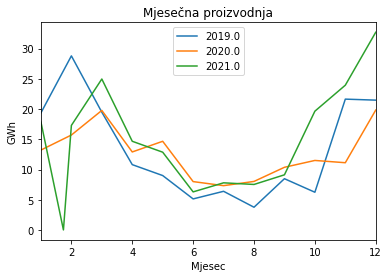

In [173]:
wind_tom.groupby("Month")["P50M_Total, GWh"].sum().plot(kind="line",title="Mjesečna proizvodnja",label=2019.)
wind_tom_2020.groupby("Month")["P50M_Total, GWh"].sum().plot(kind="line",title="Mjesečna proizvodnja", label=2020.)
wind_tom_2021.groupby("Month")["P50M_Total, GWh"].sum().plot(kind="line",title="Mjesečna proizvodnja",label=2021.)
plt.xlabel("Mjesec")
plt.ylabel("GWh")
plt.xlim(1,12)
plt.legend()

# Reference:

<br>https://power.larc.nasa.gov/data-access-viewer/
<br>https://www.thewindpower.net/turbine_en_403_siemens_swt-2.3-108.php
<br>https://en.wind-turbine-models.com/turbines/428-gamesa-g114-2.0mw#datasheet
<br>https://en.wind-turbine-models.com/turbines/966-siemens-swt-3.2-113